<a href="https://colab.research.google.com/github/linhvuueh/AI/blob/main/%5B24_02%5D_VU_PHUONG_LINH_31241023210.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.0 MB/s eta 0:00:00


189.62745727724985


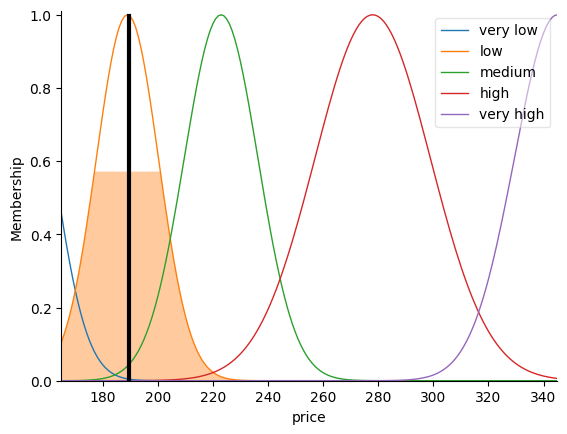

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

demand_level = ctrl.Antecedent(np.arange(0,10.1,0.1),"demand level")
competitor_pricing = ctrl.Antecedent(np.arange(100,260.1,1),"competitor pricing")
production_cost = ctrl.Antecedent(np.arange(40,135.1,1),"production cost")
seasonality = ctrl.Antecedent(np.arange(0,10.1,0.1),"seasonality")
stock_level = ctrl.Antecedent(np.arange(0,10.1,0.1),"stock level")
price = ctrl.Consequent(np.arange(165,345.01,1),"price")

demand_level['low'] = fuzz.trimf(demand_level.universe,[0,0,7.15])
demand_level['medium'] = fuzz.trimf(demand_level.universe,[4.5,6,8.5])
demand_level['high'] = fuzz.trimf(demand_level.universe,[5.75,10,10])

competitor_pricing['very low'] = fuzz.gaussmf(competitor_pricing.universe,100,2.2)
competitor_pricing['low'] = fuzz.gaussmf(competitor_pricing.universe,165,5.6)
competitor_pricing['medium'] = fuzz.gaussmf(competitor_pricing.universe,245,8)
competitor_pricing['high'] = fuzz.gaussmf(competitor_pricing.universe,260,5)

production_cost['low'] = fuzz.gaussmf(production_cost.universe,40,6.7)
production_cost['medium'] = fuzz.gaussmf(production_cost.universe,88,8.3)
production_cost['high'] = fuzz.gaussmf(production_cost.universe,125,4.3)

seasonality['off-peak'] = fuzz.trimf(seasonality.universe,[0,0,5.7])
seasonality['normal'] = fuzz.trimf(seasonality.universe,[4.5,7,8.3])
seasonality['peak'] = fuzz.trimf(seasonality.universe,[7.8,10,10])

stock_level['low'] = fuzz.trapmf(stock_level.universe,[0,0.8,1.3,3.5])
stock_level['medium'] = fuzz.trapmf(stock_level.universe,[2.7,4.2,4.9,6.9])
stock_level['high'] = fuzz.trapmf(stock_level.universe,[5.9,7.3,7.86,8.96])
stock_level['very high'] = fuzz.trapmf(stock_level.universe,[7.5,8.85,9.78,10])

price['very low']=fuzz.gaussmf(price.universe,150,12)
price['low']=fuzz.gaussmf(price.universe,189,11.3)
price['medium']=fuzz.gaussmf(price.universe,223,13.4)
price['high']=fuzz.gaussmf(price.universe,278,21)
price['very high']=fuzz.gaussmf(price.universe,345,15.6)

rule1 = ctrl.Rule(demand_level['high'] & competitor_pricing['high'] & stock_level['low'],price['very high'])
rule2 = ctrl.Rule(demand_level['high'] & seasonality['peak'] & stock_level['low'],price['very high'])
rule3 = ctrl.Rule(demand_level['medium'] & production_cost['high'] & stock_level['low'],price['very high'])

rule4 = ctrl.Rule(demand_level['high'] & competitor_pricing['medium'] & stock_level['medium'],price['high'])
rule5 = ctrl.Rule(demand_level['medium'] & competitor_pricing['high'] & stock_level['low'],price['high'])
rule6 = ctrl.Rule(demand_level['medium'] & seasonality['peak'] & stock_level['medium'],price['high'])

rule7 = ctrl.Rule(demand_level['medium'] & competitor_pricing['medium'] & stock_level['medium'],price['medium'])
rule8 = ctrl.Rule(demand_level['low'] & competitor_pricing['high'] & stock_level['medium'],price['medium'])
rule9 = ctrl.Rule(demand_level['low'] & production_cost['medium'] & stock_level['medium'],price['medium'])

rule10 = ctrl.Rule(demand_level['low'] & competitor_pricing['low'] & stock_level['high'],price['low'])
rule11 = ctrl.Rule(demand_level['medium'] & production_cost['low'] & stock_level['high'],price['low'])
rule12 = ctrl.Rule(demand_level['low'] & seasonality['off-peak'] & stock_level['high'],price['low'])

rule13 = ctrl.Rule(demand_level['low'] & competitor_pricing['low'] & stock_level['very high'],price['very low'])
rule14 = ctrl.Rule(demand_level['low'] & seasonality['off-peak'] & stock_level['very high'],price['very low'])
rule15 = ctrl.Rule(demand_level['medium'] & competitor_pricing['very low'] & stock_level['very high'],price['very low'])

pricing_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
pricing = ctrl.ControlSystemSimulation(pricing_ctrl)

pricing.input['demand level'] = 7
pricing.input['competitor pricing'] = 165
pricing.input['production cost'] = 7.9
pricing.input['seasonality'] = 7.6
pricing.input['stock level'] = 6.7
pricing.compute()

print(pricing.output['price'])
price.view(sim=pricing)

105.08284755150797 10.325399297328293


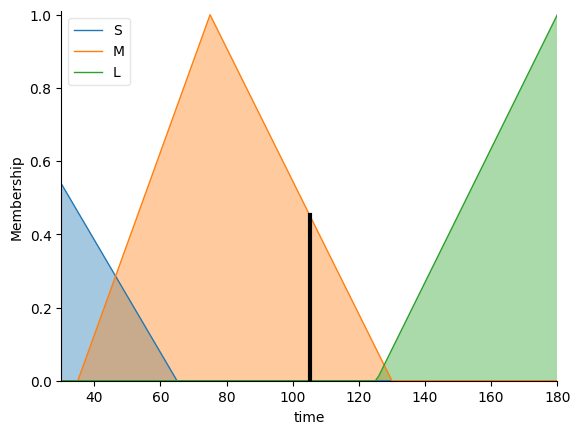

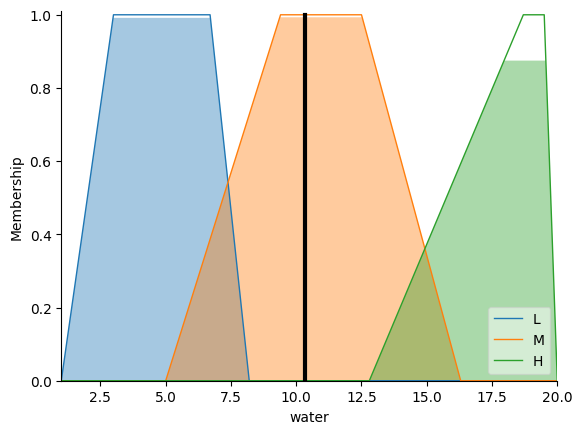

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

load = ctrl.Antecedent(np.arange(1,15.1,0.1),"load")
dirty_level = ctrl.Antecedent(np.arange(1,10.1,1),"dirty level")
fabric_type = ctrl.Antecedent(np.arange(0,10.1,1),"fabric type")
time = ctrl.Consequent(np.arange(30,180.1,1),"time")
water = ctrl.Consequent(np.arange(1,20.1,0.1),"water")

load['S'] = fuzz.gaussmf(load.universe,1,6.5)
load['M'] = fuzz.gaussmf(load.universe,8.8,9.6)
load['L'] = fuzz.gaussmf(load.universe,15,7.2)

dirty_level['L'] = fuzz.gaussmf(dirty_level.universe,1,7.2)
dirty_level['M'] = fuzz.gaussmf(dirty_level.universe,6.7,8.4)
dirty_level['H'] = fuzz.gaussmf(dirty_level.universe,10,6.8)

fabric_type['D'] = fuzz.gaussmf(fabric_type.universe,0,6.7)
fabric_type['N'] = fuzz.gaussmf(fabric_type.universe,6.8,8.3)
fabric_type['H'] = fuzz.gaussmf(fabric_type.universe,10,4.3)

time['S'] = fuzz.trimf(time.universe,[0,0,65])
time['M'] = fuzz.trimf(time.universe,[35,75,130])
time['L'] = fuzz.trimf(time.universe,[125.3,180,180])

water['L'] = fuzz.trapmf(water.universe,[1,3,6.7,8.2])
water['M'] = fuzz.trapmf(water.universe,[5,9.4,12.5,16.3])
water['H'] = fuzz.trapmf(water.universe,[12.8,18.7,19.5,20])

rule1 = ctrl.Rule(load['S'] & dirty_level['L'],time['S'])
rule2 = ctrl.Rule(load['S'] & dirty_level['M'],time['M'])
rule3 = ctrl.Rule(load['S'] & dirty_level['H'],time['L'])
rule4 = ctrl.Rule(load['M'] & dirty_level['L'],time['M'])
rule5 = ctrl.Rule(load['M'] & dirty_level['M'],time['L'])
rule6 = ctrl.Rule(load['M'] & dirty_level['H'],time['L'])
rule7 = ctrl.Rule(load['L'] & dirty_level['L'],time['M'])
rule8 = ctrl.Rule(load['L'] & dirty_level['L'],time['L'])
rule9 = ctrl.Rule(load['L'] & dirty_level['M'],time['L'])
rule10 = ctrl.Rule(load['L'] & dirty_level['M'],time['L'])
rule11 = ctrl.Rule(load['L'] & dirty_level['H'],time['L'])
rule12 = ctrl.Rule(fabric_type['D'],time['S'])
rule13 = ctrl.Rule(fabric_type['N'],time['S'])
rule14 = ctrl.Rule(fabric_type['H'],time['L'])
rule15 = ctrl.Rule(load['L'] & dirty_level['H'] & fabric_type['H'],time['L'])
rule16 = ctrl.Rule(load['S'] & dirty_level['L'] & fabric_type['D'],time['S'])
rule17 = ctrl.Rule(load['M'] & dirty_level['M'] & fabric_type['N'],time['M'])

rule1a = ctrl.Rule(load['S'] & dirty_level['L'],water['L'])
rule2a = ctrl.Rule(load['S'] & dirty_level['M'],water['M'])
rule3a = ctrl.Rule(load['S'] & dirty_level['H'],water['M'])
rule4a = ctrl.Rule(load['M'] & dirty_level['L'],water['M'])
rule5a = ctrl.Rule(load['M'] & dirty_level['M'],water['M'])
rule6a = ctrl.Rule(load['M'] & dirty_level['H'],water['H'])
rule7a = ctrl.Rule(load['L'] & dirty_level['L'],water['H'])
rule8a = ctrl.Rule(load['L'] & dirty_level['L'],water['H'])
rule9a = ctrl.Rule(load['L'] & dirty_level['M'],water['H'])
rule10a = ctrl.Rule(load['L'] & dirty_level['M'],water['H'])
rule11a = ctrl.Rule(load['L'] & dirty_level['H'],water['H'])
rule12a = ctrl.Rule(fabric_type['D'],water['L'])
rule13a = ctrl.Rule(fabric_type['N'],water['L'])
rule14a = ctrl.Rule(fabric_type['H'],water['H'])
rule15a = ctrl.Rule(load['L'] & dirty_level['H'] & fabric_type['H'],water['H'])
rule16a = ctrl.Rule(load['S'] & dirty_level['L'] & fabric_type['D'],water['L'])
rule17a = ctrl.Rule(load['M'] & dirty_level['M'] & fabric_type['N'],water['M'])

timing_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule1a,rule2a,rule3a,rule4a,rule5a,rule6a,rule7a,rule8a,rule9a,rule10a,rule11a,rule12a,rule13a,rule14a,rule15a,rule16a,rule17a])
watering_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule1a,rule2a,rule3a,rule4a,rule5a,rule6a,rule7a,rule8a,rule9a,rule10a,rule11a,rule12a,rule13a,rule14a,rule15a,rule16a,rule17a])
timing = ctrl.ControlSystemSimulation(timing_ctrl)
watering = ctrl.ControlSystemSimulation(watering_ctrl)

timing.input['load']=9.6
timing.input['dirty level']=5.8
timing.input['fabric type']=7.8
watering.input['load']=9.6
watering.input['dirty level']=5.8
watering.input['fabric type']=7.8
timing.compute()
watering.compute()

print(timing.output['time'], watering.output['water'])
time.view(sim=timing)
water.view(sim=watering)

6.258147273336909 26.188215624437678


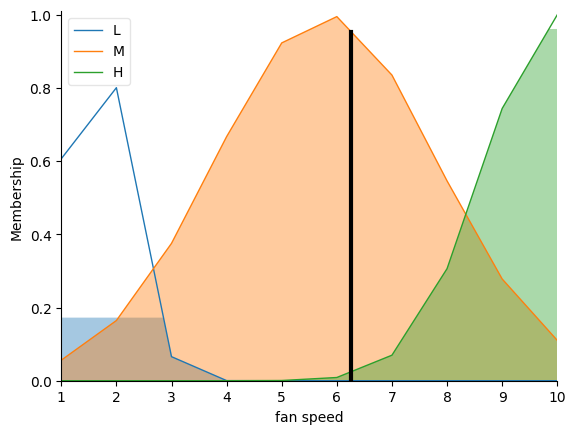

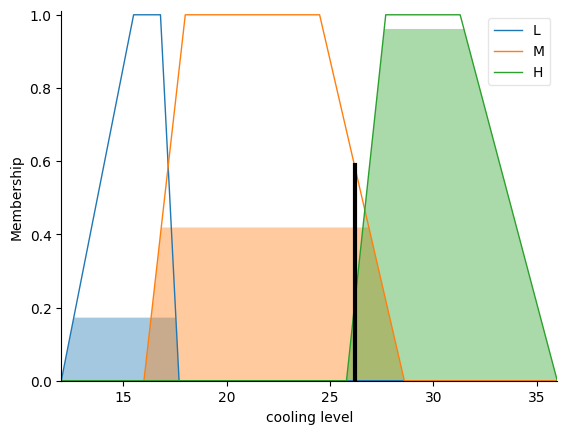

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

temperature = ctrl.Antecedent(np.arange(-5,45.1,0.1),"temperature")
humidity_level = ctrl.Antecedent(np.arange(0,100.1,1),"humidity level")
people = ctrl.Antecedent(np.arange(0,30.1,1), "people")
fan_speed = ctrl.Consequent(np.arange(1,10.1,1),"fan speed")
cooling_level = ctrl.Consequent(np.arange(12,36.1,0.1),"cooling level")

temperature['C'] = fuzz.gaussmf(temperature.universe,-2,6.5)
temperature['CL'] = fuzz.gaussmf(temperature.universe,14.5,9.6)
temperature['CM'] = fuzz.gaussmf(temperature.universe,23,7.2)
temperature['W'] = fuzz.gaussmf(temperature.universe,29.8,9.6)
temperature['H'] = fuzz.gaussmf(temperature.universe,38,7.2)

humidity_level['L'] = fuzz.trimf(humidity_level.universe,[0,0,25])
humidity_level['M'] = fuzz.trimf(humidity_level.universe,[20,59,72])
humidity_level['H'] = fuzz.trimf(humidity_level.universe,[70.3,100,100])

people['F'] = fuzz.trapmf(people.universe,[0,5,7,8])
people['M'] = fuzz.trapmf(people.universe,[6,9,14,19])
people['MA'] = fuzz.trapmf(people.universe,[17,23,28,30])

fan_speed['L'] = fuzz.gaussmf(fan_speed.universe,1.6,0.6)
fan_speed['M'] = fuzz.gaussmf(fan_speed.universe,5.8,2)
fan_speed['H'] = fuzz.gaussmf(fan_speed.universe,10,1.3)

cooling_level['L'] = fuzz.trapmf(cooling_level.universe,[12,15.5,16.8,17.7])
cooling_level['M'] = fuzz.trapmf(cooling_level.universe,[16,18,24.5,28.6])
cooling_level['H'] = fuzz.trapmf(cooling_level.universe,[25.8,27.7,31.3,36])

rule1 = ctrl.Rule(temperature['C'],fan_speed['L'])
rule2 = ctrl.Rule(temperature['CL'],fan_speed['L'])
rule3 = ctrl.Rule(temperature['CM'],fan_speed['M'])
rule4 = ctrl.Rule(temperature['W'],fan_speed['H'])
rule5 = ctrl.Rule(temperature['H'],fan_speed['H'])

rule6 = ctrl.Rule(temperature['C'],cooling_level['L'])
rule7 = ctrl.Rule(temperature['CL'],cooling_level['L'])
rule8 = ctrl.Rule(temperature['CM'],cooling_level['M'])
rule9 = ctrl.Rule(temperature['W'],cooling_level['H'])
rule10 = ctrl.Rule(temperature['H'],cooling_level['H'])

rule11 = ctrl.Rule(humidity_level['M'],fan_speed['M'])
rule12 = ctrl.Rule(humidity_level['H'],fan_speed['H'])

rule13 = ctrl.Rule(people['F'],fan_speed['L'])
rule14 = ctrl.Rule(people['M'],fan_speed['M'])
rule15 = ctrl.Rule(people['MA'],fan_speed['H'])

rule16 = ctrl.Rule(temperature['H'] & humidity_level['H'] & people['MA'],cooling_level['H'])
rule17 = ctrl.Rule(temperature['CM'] & humidity_level['M'] & people['M'],cooling_level['M'])
rule18 = ctrl.Rule(temperature['CL'] & humidity_level['L'] & people['F'],cooling_level['L'])
rule16a = ctrl.Rule(temperature['H'] & humidity_level['H'] & people['MA'],fan_speed['H'])
rule17a = ctrl.Rule(temperature['CM'] & humidity_level['M'] & people['M'],fan_speed['M'])
rule18a = ctrl.Rule(temperature['CL'] & humidity_level['L'] & people['F'],fan_speed['L'])

speeding_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule16a,rule17a,rule18a])
cooling_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule16a,rule17a,rule18a])
speeding = ctrl.ControlSystemSimulation(speeding_ctrl)
cooling = ctrl.ControlSystemSimulation(cooling_ctrl)

speeding.input['temperature'] = 32.5
speeding.input['humidity level'] = 47
speeding.input['people'] = 9
cooling.input['temperature'] = 32.5
cooling.input['humidity level'] = 47
cooling.input['people'] = 9
speeding.compute()
cooling.compute()

print(speeding.output['fan speed'], cooling.output['cooling level'])
fan_speed.view(sim=speeding)
cooling_level.view(sim=cooling)

10.626064782981379 23.35224318571636


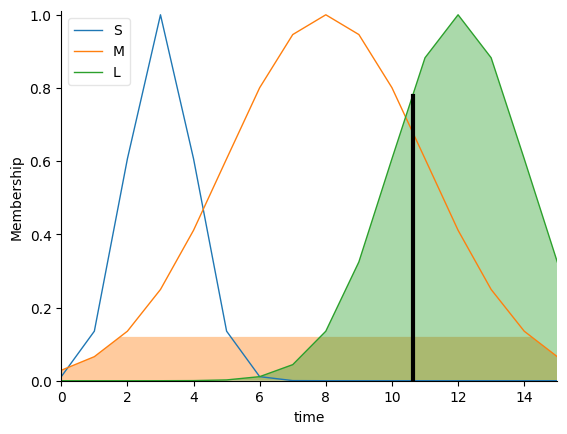

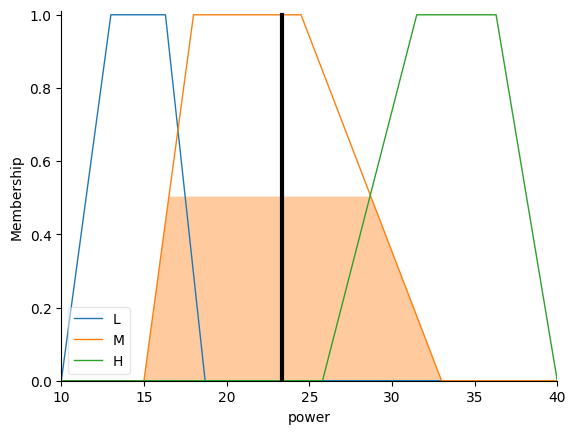

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

food_weight = ctrl.Antecedent(np.arange(0,30.1,0.1),"food weight")
food_type = ctrl.Antecedent(np.arange(0,100.1,1),"food type")
temperature = ctrl.Antecedent(np.arange(0,60.1,1), "temperature")
time = ctrl.Consequent(np.arange(0,15.1,1),"time")
power = ctrl.Consequent(np.arange(10,40.1,0.1),"power")

food_weight['L'] = fuzz.gaussmf(food_weight.universe,5.6,3.2)
food_weight['M'] = fuzz.gaussmf(food_weight.universe,15.5,5)
food_weight['H'] = fuzz.gaussmf(food_weight.universe,25,3.2)

food_type['L'] = fuzz.trimf(food_type.universe,[0,0,40])
food_type['M'] = fuzz.trimf(food_type.universe,[28,59,83])
food_type['H'] = fuzz.trimf(food_type.universe,[70.3,100,100])

temperature['C'] = fuzz.trapmf(temperature.universe,[0,6,16,20])
temperature['W'] = fuzz.trapmf(temperature.universe,[18.8,32,37,40])
temperature['H'] = fuzz.trapmf(temperature.universe,[37,45,55,60])

time['S'] = fuzz.gaussmf(time.universe,3,1)
time['M'] = fuzz.gaussmf(time.universe,8,3)
time['L'] = fuzz.gaussmf(time.universe,12,2)

power['L'] = fuzz.trapmf(power.universe,[10,13,16.3,18.7])
power['M'] = fuzz.trapmf(power.universe,[15,18,24.5,33])
power['H'] = fuzz.trapmf(power.universe,[25.8,31.5,36.3,40])

rule1 = ctrl.Rule(food_weight['L'],time['S'])
rule2 = ctrl.Rule(food_weight['M'],time['M'])
rule3 = ctrl.Rule(food_weight['H'],time['L'])

rule4 = ctrl.Rule(food_type['L'],power['L'])
rule5 = ctrl.Rule(food_type['M'],power['M'])
rule6 = ctrl.Rule(food_type['H'],power['H'])

rule7 = ctrl.Rule(temperature['C'],time['L'])
rule8 = ctrl.Rule(temperature['W'],time['M'])
rule9 = ctrl.Rule(temperature['H'],time['S'])

rule10 = ctrl.Rule(food_weight['H'] & food_type['H'] & temperature['C'],time['L'])
rule11 = ctrl.Rule(food_weight['M'] & food_type['M'] & temperature['W'],time['M'])
rule12 = ctrl.Rule(food_weight['L'] & food_type['L'] & temperature['H'],time['S'])
rule10a = ctrl.Rule(food_weight['H'] & food_type['H'] & temperature['C'],power['H'])
rule11a = ctrl.Rule(food_weight['M'] & food_type['M'] & temperature['W'],power['M'])
rule12a = ctrl.Rule(food_weight['L'] & food_type['L'] & temperature['H'],power['L'])

timing_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule10a,rule11a,rule12a])
powering_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule10a,rule11a,rule12a])
timing = ctrl.ControlSystemSimulation(timing_ctrl)
powering = ctrl.ControlSystemSimulation(powering_ctrl)

timing.input['food weight'] = 25.8
timing.input['food type'] = 43.6
timing.input['temperature'] = 15
powering.input['food weight'] = 25.8
powering.input['food type'] = 43.6
powering.input['temperature'] = 15
timing.compute()
powering.compute()

print(timing.output['time'], powering.output['power'])
time.view(sim=timing)
power.view(sim=powering)

18.93461641999869 2.7040094001321426 91.3823426266501


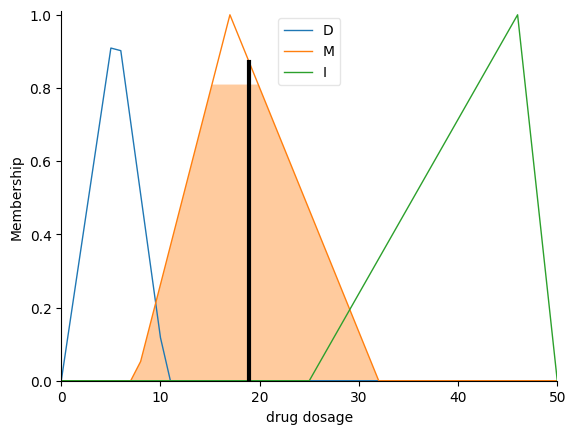

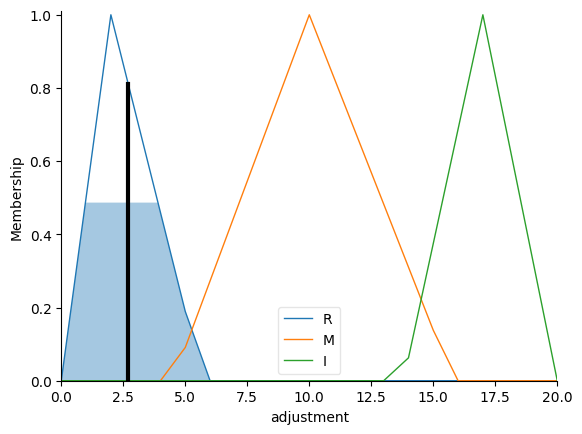

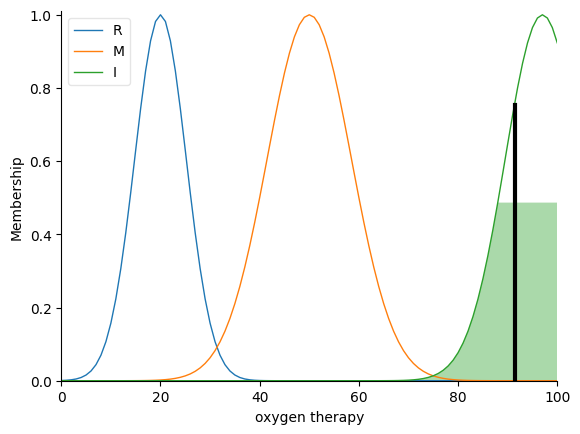

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

heart_rate = ctrl.Antecedent(np.arange(40,135.1,1),"heart rate")
blood_pressure = ctrl.Antecedent(np.arange(60, 200.1, 1), "blood pressure")
body_temperature = ctrl.Antecedent(np.arange(30,45.1,1),"body temperature")
oxygen_saturation = ctrl.Antecedent(np.arange(0,110.1,0.1),"oxygen saturation")
blood_sugar = ctrl.Antecedent(np.arange(40,200.1,1),"blood sugar")
drug_dosage = ctrl.Consequent(np.arange(0,50.01,1),"drug dosage")
adjustment = ctrl.Consequent(np.arange(0,20.01,1),"adjustment")
oxygen_therapy = ctrl.Consequent(np.arange(0,100.1,1),"oxygen therapy")

heart_rate['L'] = fuzz.trimf(heart_rate.universe,[30,30,59])
heart_rate['N'] = fuzz.trimf(heart_rate.universe,[60,78,100])
heart_rate['H'] = fuzz.trimf(heart_rate.universe,[101,135,135])
blood_pressure['L'] = fuzz.gaussmf(blood_pressure.universe,75,10)
blood_pressure['N'] = fuzz.gaussmf(blood_pressure.universe,105,15.6)
blood_pressure['H'] = fuzz.gaussmf(blood_pressure.universe,155,12.6)
body_temperature['L'] = fuzz.gaussmf(body_temperature.universe,33.5,0.7)
body_temperature['N'] = fuzz.gaussmf(body_temperature.universe,36.5,3.2)
body_temperature['H'] = fuzz.gaussmf(body_temperature.universe,39,2.5)
oxygen_saturation['L'] = fuzz.trimf(oxygen_saturation.universe,[0,76,92])
oxygen_saturation['N'] = fuzz.trimf(oxygen_saturation.universe,[89.2,95,100])
blood_sugar['L']=fuzz.gaussmf(blood_sugar.universe,50,8.9)
blood_sugar['N']=fuzz.gaussmf(blood_sugar.universe,89,12.3)
blood_sugar['H']=fuzz.gaussmf(blood_sugar.universe,197,10.4)
drug_dosage['D'] = fuzz.trimf(drug_dosage.universe,[0,5.5,10.6])
drug_dosage['M'] = fuzz.trimf(drug_dosage.universe,[7.5,17,32])
drug_dosage['I'] = fuzz.trimf(drug_dosage.universe,[25,46,50])
adjustment['R'] = fuzz.trimf(adjustment.universe,[0,2,5.7])
adjustment['M'] = fuzz.trimf(adjustment.universe,[4.5,10,15.8])
adjustment['I'] = fuzz.trimf(adjustment.universe,[13.8,17,20])
oxygen_therapy['R'] = fuzz.gaussmf(oxygen_therapy.universe,20,5.2)
oxygen_therapy['M'] = fuzz.gaussmf(oxygen_therapy.universe,50,8.5)
oxygen_therapy['I'] = fuzz.gaussmf(oxygen_therapy.universe,97,7.5)

rule1 = ctrl.Rule(heart_rate['L'] & blood_pressure['L'],adjustment['I'])
rule2 = ctrl.Rule(heart_rate['H'] & blood_pressure['H'],drug_dosage['D'])
rule3 = ctrl.Rule(heart_rate['N'] & blood_pressure['N'],drug_dosage['M'])
rule1a = ctrl.Rule(heart_rate['L'] & blood_pressure['L'],drug_dosage['I'])

rule4 = ctrl.Rule(body_temperature['L'] & oxygen_saturation['L'],oxygen_therapy['I'])
rule4a = ctrl.Rule(body_temperature['L'] & oxygen_saturation['L'],drug_dosage['I'])
rule5 = ctrl.Rule(body_temperature['N'] & oxygen_saturation['N'],drug_dosage['M'])
rule5a = ctrl.Rule(body_temperature['N'] & oxygen_saturation['N'],adjustment['M'])
rule5b = ctrl.Rule(body_temperature['N'] & oxygen_saturation['N'],oxygen_therapy['M'])
rule6 = ctrl.Rule(body_temperature['H'] & oxygen_saturation['L'],oxygen_therapy['I'])
rule6a = ctrl.Rule(body_temperature['H'] & oxygen_saturation['L'],adjustment['R'])

rule7 = ctrl.Rule(blood_sugar['H'],drug_dosage['I'])
rule8 = ctrl.Rule(blood_sugar['L'],drug_dosage['D'])
rule9 = ctrl.Rule(blood_sugar['N'],drug_dosage['M'])

rule10 = ctrl.Rule(blood_pressure['H'] & blood_sugar['H'] & heart_rate['H'],drug_dosage['D'])
rule11 = ctrl.Rule(blood_pressure['L'] & oxygen_saturation['L'] & heart_rate['L'],drug_dosage['I'])
rule11a = ctrl.Rule(blood_pressure['L'] & oxygen_saturation['L'] & heart_rate['L'],adjustment['I'])
rule11b = ctrl.Rule(blood_pressure['L'] & oxygen_saturation['L'] & heart_rate['L'],oxygen_therapy['I'])
rule12 = ctrl.Rule(body_temperature['L'] & blood_pressure['L'] & oxygen_saturation['N'],drug_dosage['I'])
rule12a = ctrl.Rule(body_temperature['L'] & blood_pressure['L'] & oxygen_saturation['N'],oxygen_therapy['M'])

dosaging_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule1a,rule4,rule4a,rule5,rule5a,rule5b,rule6,rule6a,rule7,rule8,rule9,rule10,rule11,rule11a,rule11b,rule12,rule12a])
adjustmenting_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule1a,rule4,rule4a,rule5,rule5a,rule5b,rule6,rule6a,rule7,rule8,rule9,rule10,rule11,rule11a,rule11b,rule12,rule12a])
therapying_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule1a,rule4,rule4a,rule5,rule5a,rule5b,rule6,rule6a,rule7,rule8,rule9,rule10,rule11,rule11a,rule11b,rule12,rule12a])
dosaging = ctrl.ControlSystemSimulation(dosaging_ctrl)
adjustmenting = ctrl.ControlSystemSimulation(adjustmenting_ctrl)
therapying = ctrl.ControlSystemSimulation(therapying_ctrl)

dosaging.input['heart rate'] = 97
dosaging.input['blood pressure'] = 125
dosaging.input['body temperature'] = 36
dosaging.input['oxygen saturation'] = 70
dosaging.input['blood sugar'] = 97

adjustmenting.input['heart rate'] = 97
adjustmenting.input['blood pressure'] = 125
adjustmenting.input['body temperature'] = 36
adjustmenting.input['oxygen saturation'] = 70
adjustmenting.input['blood sugar'] = 97

therapying.input['heart rate'] = 97
therapying.input['blood pressure'] = 125
therapying.input['body temperature'] = 36
therapying.input['oxygen saturation'] = 70
therapying.input['blood sugar'] = 97

dosaging.compute()
adjustmenting.compute()
therapying.compute()
print(dosaging.output['drug dosage'], adjustmenting.output['adjustment'], therapying.output['oxygen therapy'])
drug_dosage.view(sim=dosaging)
adjustment.view(sim=adjustmenting)
oxygen_therapy.view(sim=therapying)

1.5


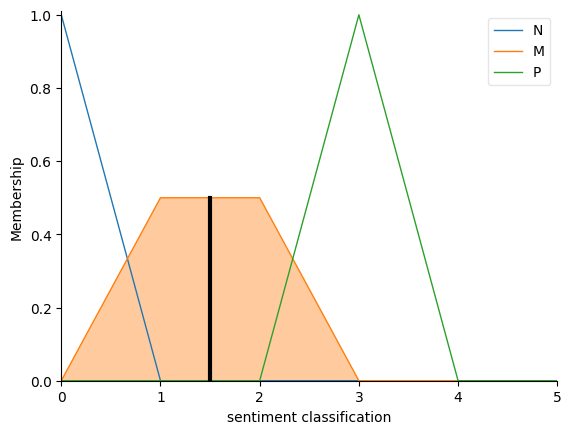

In [6]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

sentiment_score = ctrl.Antecedent(np.arange(0,1.1,0.1),'sentiment score')
emotion_intensity = ctrl.Antecedent(np.arange(0, 3.1, 1), 'emotion intensity')
positive_words = ctrl.Antecedent(np.arange(0,6.1,1),'positive words')
negative_words = ctrl.Antecedent(np.arange(0,6.1,0.1),'negative words')
sentiment_classification = ctrl.Consequent(np.arange(0,5.01,1),'sentiment classification')

sentiment_score['N'] = fuzz.trimf(sentiment_score.universe,[0,0,0.3])
sentiment_score['M'] = fuzz.trimf(sentiment_score.universe,[0.2,0.5,0.7])
sentiment_score['P'] = fuzz.trimf(sentiment_score.universe,[0.6,1,1])

emotion_intensity['L'] = fuzz.gaussmf(emotion_intensity.universe,0.5,0.2)
emotion_intensity['M'] = fuzz.gaussmf(emotion_intensity.universe,1.5,0.6)
emotion_intensity['H'] = fuzz.gaussmf(emotion_intensity.universe,155,12.6)
positive_words['F'] = fuzz.gaussmf(positive_words.universe,33.5,0.7)
positive_words['S'] = fuzz.gaussmf(positive_words.universe,36.5,3.2)
positive_words['M'] = fuzz.gaussmf(positive_words.universe,39,2.5)

negative_words['F'] = fuzz.trimf(negative_words.universe,[0,0,2])
negative_words['S'] = fuzz.trimf(negative_words.universe,[1.3,4.5,5.7])
negative_words['M'] = fuzz.trimf(negative_words.universe,[5,6,6])

sentiment_classification['N'] = fuzz.trimf(sentiment_classification.universe,[0,0,1])
sentiment_classification['M'] = fuzz.trimf(sentiment_classification.universe,[0.5,1.5,2.5])
sentiment_classification['P'] = fuzz.trimf(sentiment_classification.universe,[2,3,3])

rule1 = ctrl.Rule(sentiment_score['N'] & emotion_intensity['H'],sentiment_classification['N'])
rule2 = ctrl.Rule(sentiment_score['N'] & emotion_intensity['L'],sentiment_classification['M'])
rule3 = ctrl.Rule(sentiment_score['M'] & emotion_intensity['M'],sentiment_classification['M'])
rule4 = ctrl.Rule(sentiment_score['P'] & emotion_intensity['H'],sentiment_classification['P'])
rule5 = ctrl.Rule(positive_words['M'] & negative_words['F'],sentiment_classification['P'])
rule6 = ctrl.Rule(positive_words['F'] & negative_words['M'],sentiment_classification['N'])
rule7 = ctrl.Rule(positive_words['S'] & negative_words['S'],sentiment_classification['M'])

rule8 = ctrl.Rule(sentiment_score['N'] & emotion_intensity['H'] & negative_words['M'],sentiment_classification['N'])
rule9 = ctrl.Rule(sentiment_score['M'] & emotion_intensity['M'] & positive_words['S'],sentiment_classification['M'])
rule10 = ctrl.Rule(emotion_intensity['H'] & positive_words['M'] & sentiment_score['P'],sentiment_classification['P'])

classification_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10])
classification = ctrl.ControlSystemSimulation(classification_ctrl)

classification.input['sentiment score'] = 0.5
classification.input['emotion intensity'] = 1
classification.input['positive words'] = 3
classification.input['negative words'] = 5

classification.compute()
print(classification.output['sentiment classification'])
sentiment_classification.view(sim=classification)

18.16666666666667
2.7839729949932512
2.513390467385041


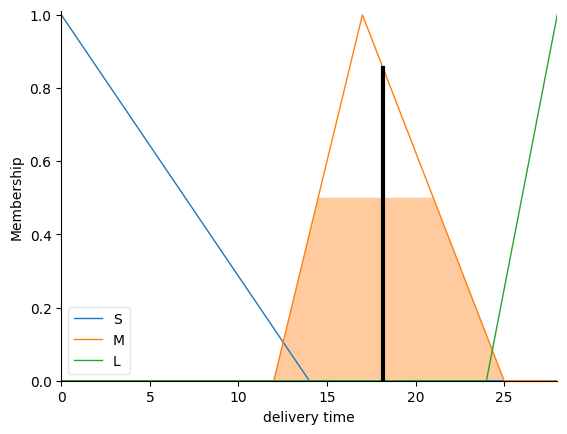

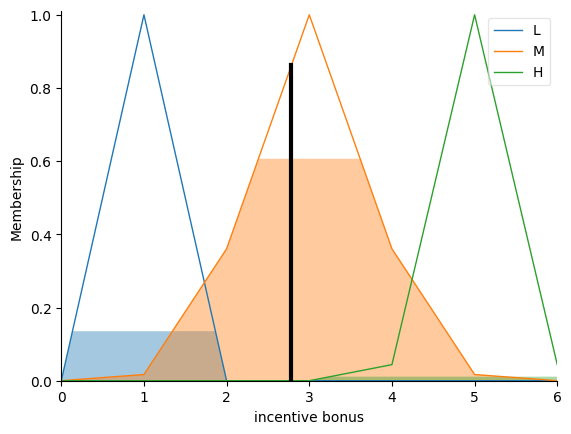

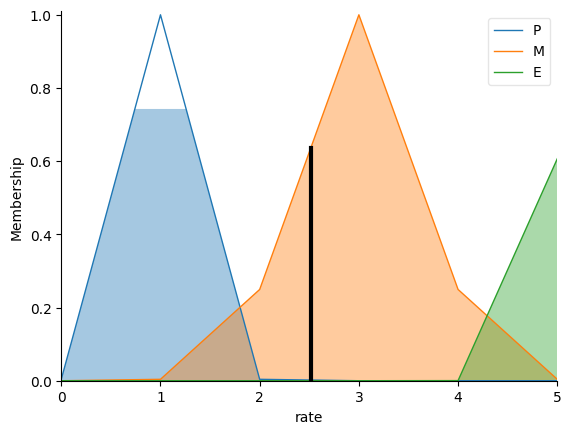

In [19]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

traffic_condition = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'traffic condition')
distance = ctrl.Antecedent(np.arange(0, 10.1, 1), 'distance')
weather_condition = ctrl.Antecedent(np.arange(0, 6.1, 1), 'weather condition')
order_preparation = ctrl.Antecedent(np.arange(0, 20.1, 1), 'order preparation')
driver_fatigue = ctrl.Antecedent(np.arange(0, 6.1, 1), 'driver fatigue')
delivery_time = ctrl.Consequent(np.arange(0, 28.1, 1), 'delivery time')
incentive_bonus = ctrl.Consequent(np.arange(0, 6.1, 1), 'incentive bonus')
rate = ctrl.Consequent(np.arange(0, 5.1, 1), 'rate')

traffic_condition['L'] = fuzz.trimf(traffic_condition.universe, [0, 0, 0.3])
traffic_condition['M'] = fuzz.trimf(traffic_condition.universe, [0.22, 0.5, 0.7])
traffic_condition['H'] = fuzz.trimf(traffic_condition.universe, [0.6, 1, 1])

distance['S'] = fuzz.gaussmf(distance.universe, 1.5, 1)
distance['M'] = fuzz.gaussmf(distance.universe, 5, 2)
distance['L'] = fuzz.gaussmf(distance.universe, 8, 2)

weather_condition['C'] = fuzz.gaussmf(weather_condition.universe, 1, 0.5)
weather_condition['R'] = fuzz.gaussmf(weather_condition.universe, 3, 1)
weather_condition['S'] = fuzz.gaussmf(weather_condition.universe, 5, 1)

order_preparation['F'] = fuzz.trimf(order_preparation.universe, [0, 0, 8])
order_preparation['M'] = fuzz.trimf(order_preparation.universe, [5, 15, 18])
order_preparation['S'] = fuzz.trimf(order_preparation.universe, [15, 20, 20])

driver_fatigue['L'] = fuzz.gaussmf(driver_fatigue.universe, 2.3,2)
driver_fatigue['M'] = fuzz.gaussmf(driver_fatigue.universe, 3.5,5)
driver_fatigue['H'] = fuzz.gaussmf(driver_fatigue.universe, 5.7,3.5)

delivery_time['S'] = fuzz.trimf(delivery_time.universe, [0, 0, 14])
delivery_time['M'] = fuzz.trimf(delivery_time.universe, [12, 17, 25])
delivery_time['L'] = fuzz.trimf(delivery_time.universe, [24, 28, 28])

incentive_bonus['L'] = fuzz.gaussmf(incentive_bonus.universe, 1, 0.2)
incentive_bonus['M'] = fuzz.gaussmf(incentive_bonus.universe, 3, 0.7)
incentive_bonus['H'] = fuzz.gaussmf(incentive_bonus.universe, 5, 0.4)

rate['P'] = fuzz.gaussmf(rate.universe, 1, 0.3)
rate['M'] = fuzz.gaussmf(rate.universe, 3, 0.6)
rate['E'] = fuzz.gaussmf(rate.universe, 4.8, 0.2)

rule1 = ctrl.Rule(traffic_condition['L'] & distance['S'],delivery_time['S'])
rule2 = ctrl.Rule(traffic_condition['M'] & distance['M'],delivery_time['M'])
rule3 = ctrl.Rule(traffic_condition['H'] & distance['L'],delivery_time['L'])

rule4 = ctrl.Rule(weather_condition['C'],incentive_bonus['L'])
rule5 = ctrl.Rule(weather_condition['R'],incentive_bonus['M'])
rule6 = ctrl.Rule(weather_condition['S'],incentive_bonus['H'])

rule7 = ctrl.Rule(driver_fatigue['L'],rate['E'])
rule8 = ctrl.Rule(driver_fatigue['M'],rate['M'])
rule9 = ctrl.Rule(driver_fatigue['H'],rate['P'])

rule10 = ctrl.Rule(traffic_condition['L'] & order_preparation['F'],delivery_time['S'])
rule11 = ctrl.Rule(traffic_condition['M'] & order_preparation['M'],delivery_time['M'])
rule12 = ctrl.Rule(traffic_condition['H'] & order_preparation['S'],delivery_time['L'])

rule13 = ctrl.Rule(distance['L'] & weather_condition['S'] & traffic_condition['H'],delivery_time['L'])
rule14 = ctrl.Rule(distance['L'] & weather_condition['S'] & traffic_condition['H'],incentive_bonus['H'])
rule15 = ctrl.Rule(distance['S'] & weather_condition['C'] & traffic_condition['L'],delivery_time['S'])
rule16 = ctrl.Rule(distance['S'] & weather_condition['C'] & traffic_condition['L'],incentive_bonus['L'])
rule17 = ctrl.Rule(driver_fatigue['H'] & traffic_condition['H'],rate['P'])
rule18 = ctrl.Rule(driver_fatigue['H'] & traffic_condition['H'],delivery_time['L'])

timing_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18])
bonusing_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18])
rating_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18])
timing = ctrl.ControlSystemSimulation(timing_ctrl)
bonusing = ctrl.ControlSystemSimulation(bonusing_ctrl)
rating = ctrl.ControlSystemSimulation(rating_ctrl)

timing.input['traffic condition'] = 0.6
timing.input['distance'] = 3.7
timing.input['weather condition'] = 2
timing.input['order preparation'] = 14
timing.input['driver fatigue'] = 3
bonusing.input['traffic condition'] = 0.6
bonusing.input['distance'] = 3.7
bonusing.input['weather condition'] = 2
bonusing.input['order preparation'] = 14
bonusing.input['driver fatigue'] = 3
rating.input['traffic condition'] = 0.6
rating.input['distance'] = 3.7
rating.input['weather condition'] = 2
rating.input['order preparation'] = 14
rating.input['driver fatigue'] = 3
timing.compute()
bonusing.compute()
rating.compute()
print(timing.output['delivery time'])
print(bonusing.output['incentive bonus'])
print(rating.output['rate'])
delivery_time.view(sim=timing)
incentive_bonus.view(sim=bonusing)
rate.view(sim=rating)